In [4]:
%matplotlib inline

from imports import *
from matplotlib.patches import ConnectionPatch
np.set_printoptions(suppress=True)

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
source     = '/home/sobolev/nevermind/Andrey/data'
session    = '008229_hippoSIT_2022-05-17_21-44-43'
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:gray']  # for diff neurons

animal  = session.split('_')[0]
sessionpath = os.path.join(source, animal, session)
h5name  = os.path.join(source, animal, session, session + '.h5')

## Head direction / unit

(0.0, 0.5)

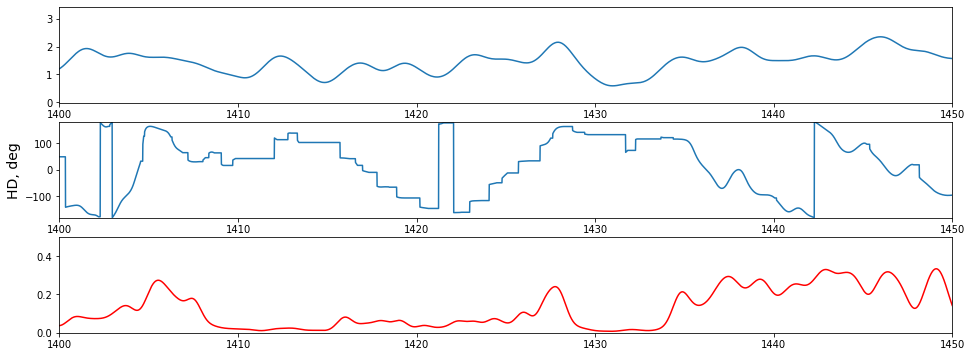

In [9]:
tp1, tp2 = 1400, 1450
unit_name = '8-2'

with h5py.File(h5name, 'r') as f:
    tl = np.array(f['processed']['timeline'])
    i_rate = np.array(f['units'][unit_name][H5NAMES.inst_rate['name']])
    s_times = np.array(f['units'][unit_name][H5NAMES.spike_times['name']])

i_rate = instantaneous_rate(s_times, tl[:, 0], k_width=50)
    
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(311)
ax.plot(tl[:, 0], i_rate)
ax.set_xlim(tp1, tp2)

# head direction
hd = np.rad2deg(tl[:, 4])
ax = fig.add_subplot(312)
ax.plot(tl[:, 0], hd)
ax.set_xlim(tp1, tp2)
ax.set_ylim(-180, 180)
ax.set_ylabel('HD, deg', fontsize=14)

# speed
width = 300  # 100 points ~= 1 sec with at 100Hz
kernel = signal.gaussian(width, std=(width) / 7.2)
s_smooth = np.convolve(tl[:, 3], kernel, 'same') / kernel.sum()

ax = fig.add_subplot(313)
ax.plot(tl[:, 0], s_smooth, color='red')
ax.set_xlim(tp1, tp2)
ax.set_ylim(0, .5)